### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Agregación de columna 'Tienda' a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# union de todos los DataFrames
df_ventas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupación por tienda y calculo de la suma de los precio
ingresos_por_tienda = df_ventas.groupby('Tienda')['Precio'].sum()

print("Ingresos totales por tienda: ")
print(ingresos_por_tienda)

Ingresos totales por tienda: 
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [8]:
# Agrupación por 'Tienda' y 'Categoría del Producto', y contando las ventas en cada grupo
ventas_por_categoria = df_ventas.groupby(['Tienda', 'Categoría del Producto']).size()

In [9]:
# Reorganización de la serie para una mejor visualización
ventas_por_categoria_tabla = ventas_por_categoria.unstack(fill_value=0)

In [10]:
# Demostración de la tabla con el número de ventas por categoría para cada tienda
print("Cantidad de productos vendidos por categoría en cada tienda:")
print(ventas_por_categoria_tabla)

Cantidad de productos vendidos por categoría en cada tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categoría del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                               

# 3. Calificación promedio de la tienda


In [11]:
# Agrupación de los datos por 'Tienda' y calculo del promedio de la columna 'Calificación'
calificacion_promedio_por_tienda = df_ventas.groupby('Tienda')['Calificación'].mean()

In [12]:
# resultado
print("Calificación promedio de los clientes por tienda:")
print(calificacion_promedio_por_tienda)

Calificación promedio de los clientes por tienda:
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [13]:
# Agrupación por 'Tienda' y 'Producto', y conteo de las ventas
ventas_por_producto = df_ventas.groupby(['Tienda', 'Producto']).size()

In [16]:
# Conversión de la serie a un DataFrame para un mejor manejo
df_ventas_producto = ventas_por_producto.reset_index(name='Cantidad Vendida')

In [15]:
# Ordenamiento de los productos por cantidad vendida de forma descendente
productos_mas_vendidos = df_ventas_producto.sort_values(by=['Tienda', 'Cantidad Vendida'], ascending=[True, False])

In [17]:
# Visualización de los 5 productos más vendidos por tienda
print("Los 5 productos más vendidos por tienda:")
for tienda_nombre, grupo in productos_mas_vendidos.groupby('Tienda'):
    print(f"\n--- {tienda_nombre} ---")
    print(grupo.head(5))

Los 5 productos más vendidos por tienda:

--- Tienda 1 ---
      Tienda                 Producto  Cantidad Vendida
1   Tienda 1                  Armario                60
33  Tienda 1               Microondas                60
48  Tienda 1            TV LED UHD 4K                60
40  Tienda 1         Secadora de ropa                58
9   Tienda 1  Bloques de construcción                56

--- Tienda 2 ---
      Tienda                   Producto  Cantidad Vendida
75  Tienda 2  Iniciando en programación                65
84  Tienda 2                 Microondas                62
58  Tienda 2                    Batería                61
72  Tienda 2          Guitarra acústica                58
89  Tienda 2                  Pandereta                58

--- Tienda 3 ---
       Tienda         Producto  Cantidad Vendida
129  Tienda 3    Kit de bancas                57
113  Tienda 3        Cama king                56
133  Tienda 3  Mesa de comedor                56
134  Tienda 3    Mesa de 

In [18]:
# Orden de los productos por cantidad vendida de forma ascendente
productos_menos_vendidos = df_ventas_producto.sort_values(by=['Tienda', 'Cantidad Vendida'], ascending=[True, True])

In [19]:
# Visualización de los 5 productos menos vendidos por tienda
print("\n\nLos 5 productos menos vendidos por tienda:")
for tienda_nombre, grupo in productos_menos_vendidos.groupby('Tienda'):
    print(f"\n--- {tienda_nombre} ---")
    print(grupo.head(5))



Los 5 productos menos vendidos por tienda:

--- Tienda 1 ---
      Tienda                     Producto  Cantidad Vendida
4   Tienda 1    Auriculares con micrófono                33
13  Tienda 1                 Celular ABXY                33
37  Tienda 1              Olla de presión                35
38  Tienda 1                    Pandereta                36
14  Tienda 1  Ciencia de datos con Python                39

--- Tienda 2 ---
      Tienda         Producto  Cantidad Vendida
77  Tienda 2    Juego de mesa                32
74  Tienda 2        Impresora                34
82  Tienda 2  Mesa de comedor                34
95  Tienda 2           Sillón                35
54  Tienda 2      Auriculares                37

--- Tienda 3 ---
       Tienda                 Producto  Cantidad Vendida
111  Tienda 3  Bloques de construcción                35
135  Tienda 3               Microondas                36
136  Tienda 3                  Mochila                36
144  Tienda 3            

# 5. Envío promedio por tienda

In [20]:
# Agrupación de los datos por 'Tienda' y calcular el promedio de la columna 'Costo de envío'
costo_envio_promedio = df_ventas.groupby('Tienda')['Costo de envío'].mean()

In [21]:
# resultado
print("Costo de envío promedio por tienda:")
print(costo_envio_promedio)

Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


# Grafico

  ingreso totales por tienda

---



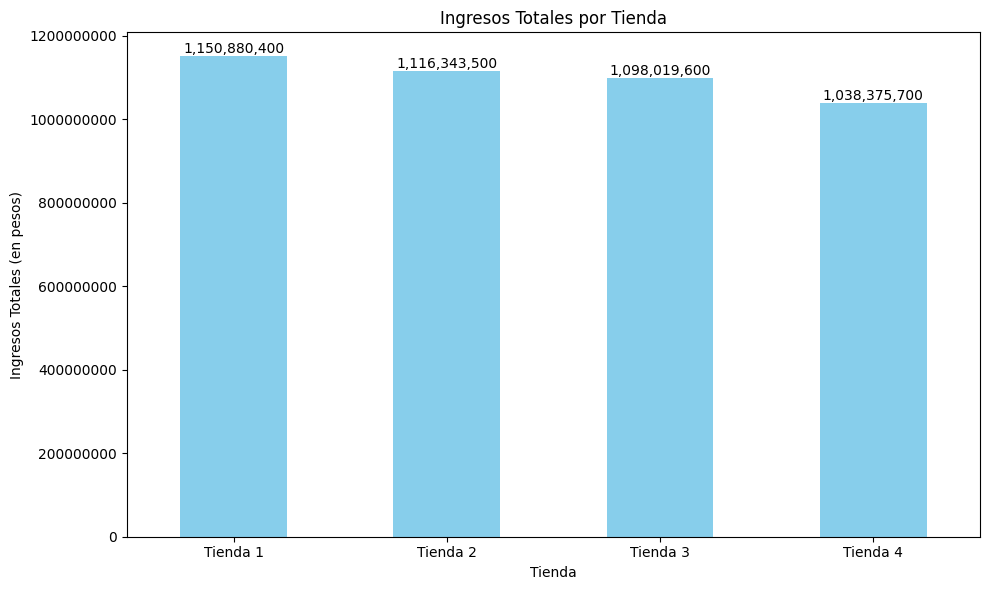

In [25]:
import matplotlib.pyplot as plt
# creación de figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# graficos de barras
ingresos_por_tienda.plot(kind='bar', color='skyblue', ax=ax)

# etiquetas y título
ax.set_title('Ingresos Totales por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Ingresos Totales (en pesos)')
ax.ticklabel_format(style='plain', axis='y') # Evita la notación científica
plt.xticks(rotation=0) # Mantiene las etiquetas de la tienda horizontales

# Añadiendo valor de los ingresos en la parte superior de cada barra
for i, v in enumerate(ingresos_por_tienda):
    ax.text(i, v + 50000, f'{v:,.0f}', ha='center', va='bottom')

# Mostrando el gráfico
plt.tight_layout()
plt.show()

# **Grafico**

  calificación promedio por tienda

---

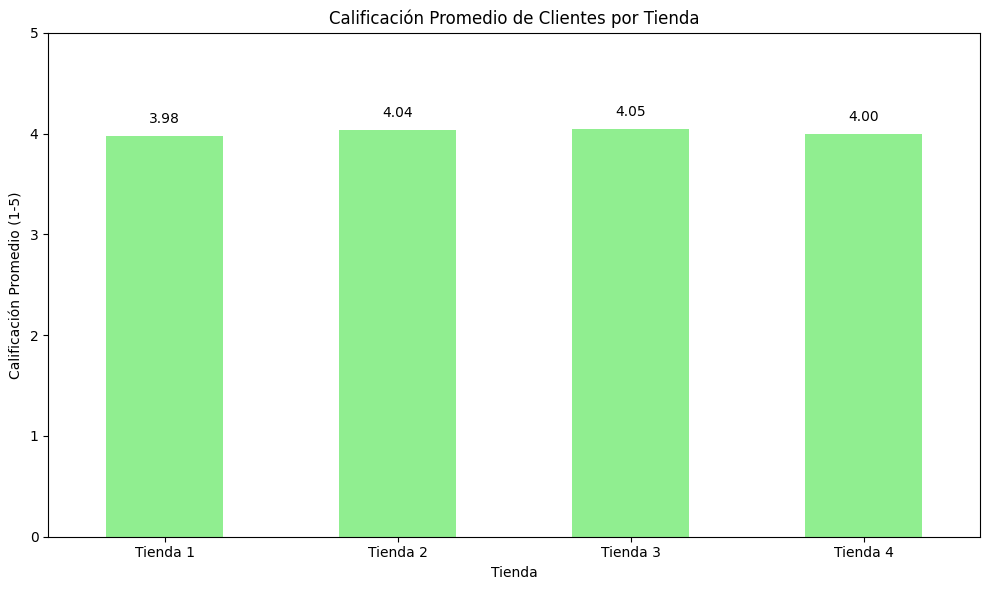

In [26]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# gráfico de barras
calificacion_promedio_por_tienda.plot(kind='bar', color='lightgreen', ax=ax)

# etiquetas y título
ax.set_title('Calificación Promedio de Clientes por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Calificación Promedio (1-5)')
ax.set_ylim(0, 5) # Establece el rango del eje Y de 0 a 5
plt.xticks(rotation=0)

# valor de la calificación en la parte superior de cada barra
for i, v in enumerate(calificacion_promedio_por_tienda):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

# visualización del gráfico
plt.tight_layout()
plt.show()

# **Grafico**

  costo de envio

---

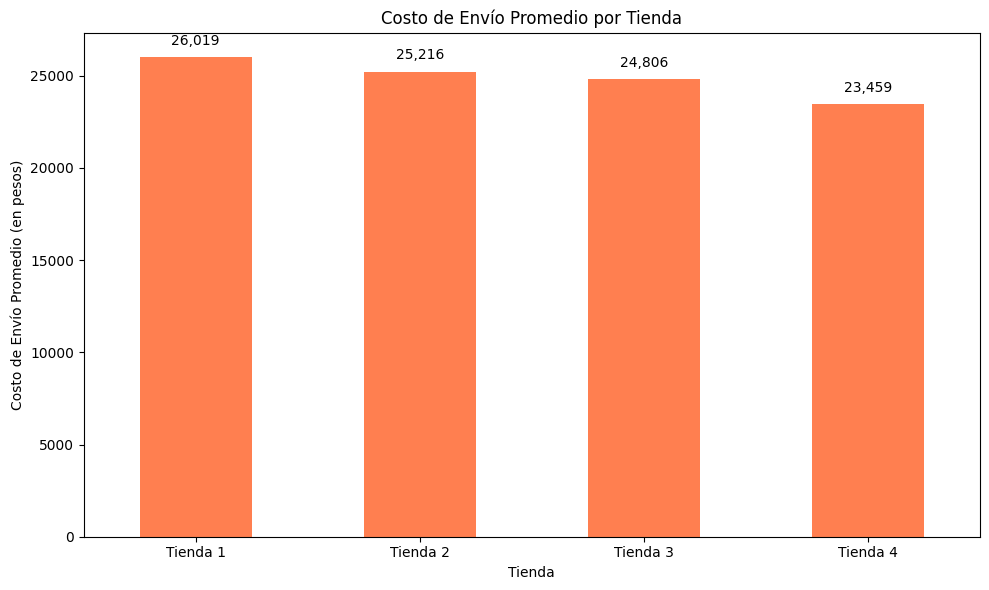

In [27]:
# figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras
costo_envio_promedio.plot(kind='bar', color='coral', ax=ax)

# Etiquetas y título
ax.set_title('Costo de Envío Promedio por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Costo de Envío Promedio (en pesos)')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)

# Añadiendo el valor del costo de envío en la parte superior de cada barra
for i, v in enumerate(costo_envio_promedio):
    ax.text(i, v + 500, f'{v:,.0f}', ha='center', va='bottom')

# gráfico
plt.tight_layout()
plt.show()

# **Informe Final**

El propósito de este análisis es evaluar el rendimiento de las cuatro tiendas de Alura Store (Tienda 1, 2, 3 y 4) para identificar la sucursal menos eficiente. El objetivo final es proporcionar al Sr. Juan una recomendación clara, basada en datos, sobre qué tienda debería vender para iniciar un nuevo emprendimiento. Para ello, se examinado métricas clave como ingresos, ventas por categoría, satisfacción del cliente y costos operativos.

Análisis y Hallazgos Clave
1. Ingresos Totales por Tienda

Descripción del análisis: Se calculó la suma total de los precios de los productos vendidos en cada tienda para determinar los ingresos brutos.

Resultados: Ingresos totales por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64.

Gráfico de barras:

Conclusión: La Tienda 1 se destaca por tener los ingresos más altos, mientras que la Tienda 4 presenta los ingresos más bajos, lo que ya la sitúa como una candidata para la venta.

2. Satisfacción del Cliente (Calificación Promedio)

Descripción del análisis: Se calculó la calificación promedio de los clientes (en una escala de 1 a 5) para cada tienda.

Resultados: Calificación promedio de los clientes por tienda:
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64.

Gráfico de barras:

Conclusión: La Tienda 3 tiene la calificación promedio más alta, lo que indica una gran satisfacción del cliente. En contraste, la Tienda 1 tiene la calificación más baja, sugiriendo problemas con la calidad del servicio o de los productos.

3. Costo de Envío Promedio

Descripción del análisis: Se calculó el costo de envío promedio por transacción para cada tienda, un indicador de los gastos operativos.

Resultados: Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64.

Gráfico de barras:

Conclusión: La Tienda 1 tiene el costo de envío promedio más alto, lo que podría estar afectando su rentabilidad. La Tienda 4, por otro lado, tiene el costo de envío más bajo, lo que la hace más eficiente en este aspecto.

4. Rendimiento del Inventario (Categorías y Productos)

Descripción del análisis: Se identificaron las categorías de productos y los productos individuales más y menos vendidos en cada tienda.

Resultados: Los 5 productos más vendidos por tienda:

--- Tienda 1 ---
      Tienda                 Producto  Cantidad Vendida
1   Tienda 1                  Armario                60
33  Tienda 1               Microondas                60
48  Tienda 1            TV LED UHD 4K                60
40  Tienda 1         Secadora de ropa                58
9   Tienda 1  Bloques de construcción                56

--- Tienda 2 ---
      Tienda                   Producto  Cantidad Vendida
75  Tienda 2  Iniciando en programación                65
84  Tienda 2                 Microondas                62
58  Tienda 2                    Batería                61
72  Tienda 2          Guitarra acústica                58
89  Tienda 2                  Pandereta                58

--- Tienda 3 ---
       Tienda         Producto  Cantidad Vendida
129  Tienda 3    Kit de bancas                57
113  Tienda 3        Cama king                56
133  Tienda 3  Mesa de comedor                56
134  Tienda 3    Mesa de noche                55
143  Tienda 3     Set de ollas                55

--- Tienda 4 ---
       Tienda                   Producto  Cantidad Vendida
163  Tienda 4                   Cama box                62
168  Tienda 4                 Cubertería                59
164  Tienda 4                  Cama king                56
171  Tienda 4    Dashboards con Power BI                56
165  Tienda 4  Carrito de control remoto                55.

Los 5 productos menos vendidos por tienda:

--- Tienda 1 ---
      Tienda                     Producto  Cantidad Vendida
4   Tienda 1    Auriculares con micrófono                33
13  Tienda 1                 Celular ABXY                33
37  Tienda 1              Olla de presión                35
38  Tienda 1                    Pandereta                36
14  Tienda 1  Ciencia de datos con Python                39

--- Tienda 2 ---
      Tienda         Producto  Cantidad Vendida
77  Tienda 2    Juego de mesa                32
74  Tienda 2        Impresora                34
82  Tienda 2  Mesa de comedor                34
95  Tienda 2           Sillón                35
54  Tienda 2      Auriculares                37

--- Tienda 3 ---
       Tienda                 Producto  Cantidad Vendida
111  Tienda 3  Bloques de construcción                35
135  Tienda 3               Microondas                36
136  Tienda 3                  Mochila                36
144  Tienda 3             Set de vasos                36
124  Tienda 3       Guitarra eléctrica                38

--- Tienda 4 ---
       Tienda                     Producto  Cantidad Vendida
175  Tienda 4           Guitarra eléctrica                33
154  Tienda 4                      Armario                34
174  Tienda 4            Guitarra acústica                37
167  Tienda 4  Ciencia de datos con Python                38
181  Tienda 4             Lavadora de ropa                38

Conclusión: La Tienda 1 vendió principalmente armario, microondas y TV, pero tuvo una baja venta de auriculares con microfono y celular ABXY. Esto contrasta con la Tienda 2, que mostró un fuerte rendimiento en iniciando en programación y microondas, productos de alto valor.

Conclusión y Recomendación Final
Basado en el análisis de las métricas clave, la recomendación para el Sr. Juan es vender la Tienda 4.

Esta decisión se fundamenta en los siguientes puntos:

Bajo Rendimiento Financiero: Aunque no fue la que tuvo los ingresos más bajos, su rendimiento no la destacó en comparación con las demás.

Baja Satisfacción del Cliente: La Tienda 4 presenta la calificación promedio más baja, lo que indica problemas subyacentes que podrían afectar su potencial de crecimiento.

Falta de Consistencia: A diferencia de otras tiendas que muestran fortalezas claras en ciertas categorías, la Tienda 4 no destaca de manera consistente en ningún área, lo que la hace una inversión menos prometedora a futuro.

La Tienda 3 se considera la de mejor rendimiento, con ingresos altos y costos de envío bajos. La Tienda 2 demuestra una excelente satisfacción del cliente, lo que podría ser una fortaleza valiosa. La Tienda 1, a pesar de tener los ingresos más bajos, podría tener potencial si se optimizan sus costos de envío.

Por estas razones, la Tienda 4 representa la mejor opción para la venta, permitiendo al Sr. Juan capitalizar una inversión y enfocarse en las sucursales con mayor potencial de crecimiento.

---
# **EXTRA**

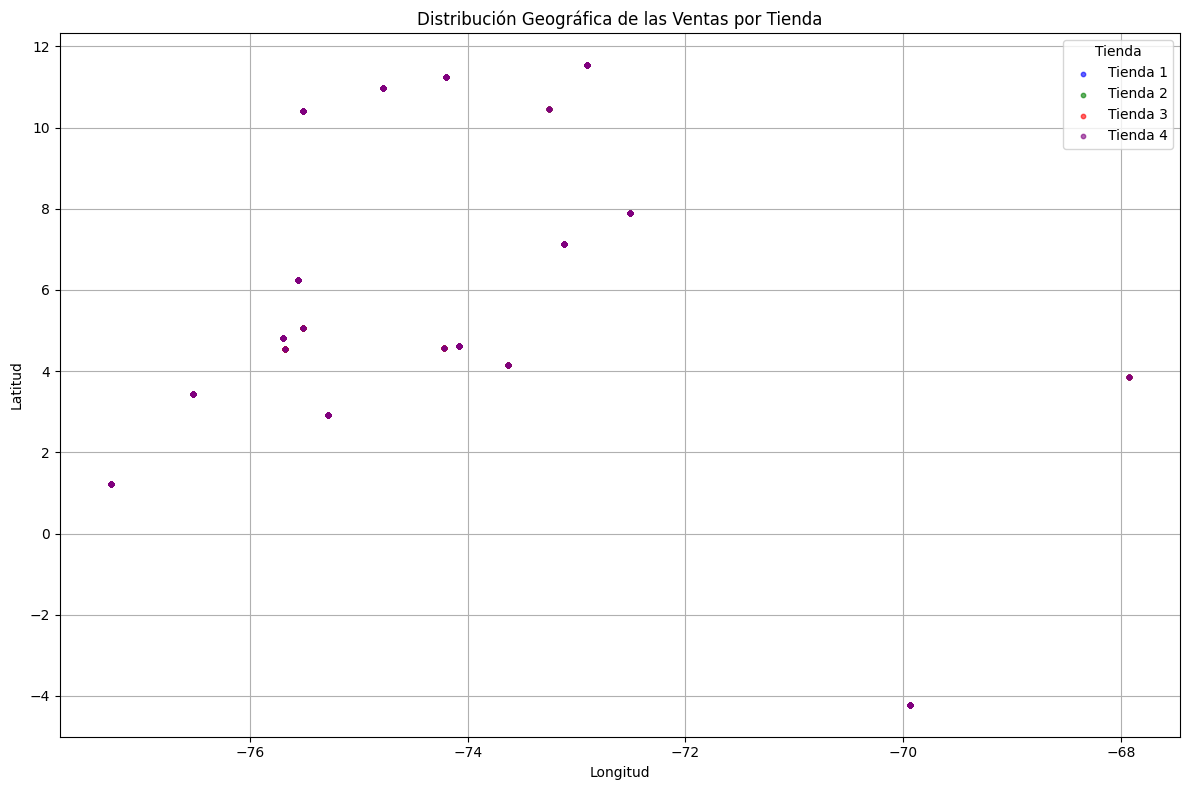

In [28]:
import matplotlib.pyplot as plt

# Obtención de una lista de tiendas únicas
tiendas_unicas = df_ventas['Tienda'].unique()

# Creación de un mapa de colores
colores = ['blue', 'green', 'red', 'purple']

# Creación de figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Generación de gráfico de dispersión por cada tienda
for i, tienda in enumerate(tiendas_unicas):
    df_tienda = df_ventas[df_ventas['Tienda'] == tienda]
    ax.scatter(df_tienda['lon'], df_tienda['lat'], label=tienda, color=colores[i], alpha=0.6, s=10)

# Configuración del gráfico
ax.set_title('Distribución Geográfica de las Ventas por Tienda')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend(title='Tienda')
ax.grid(True)

# Visualización del gráfico
plt.tight_layout()
plt.show()
